<a href="https://colab.research.google.com/github/kaindoh/Sign-language-project/blob/master/Sign_language_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Sign Language is a communication language just like any other language which is used among deaf and dumb community. This dataset is a complete set of gestures which are used in sign language and can be used by other normal people for better understanding of the sign language gestures 

# Problem Statement

Generally dumb people use sign language for communication, but they find difficulty in communicating with others who don't understand sign language. So there is a barrier in communication between these two communities.

# Solution

This work aims to lower this barrier in communication. The main aim of this project is to create a gesture image classifier which after deployment it can take in videos that has sign language and interprate them to someobody who does not understand sign language. 

# Content

*    The dataset consists of 37 different hand sign gestures which includes A-Z alphabet gestures, 0-9 number gestures and _ for        space.
*    Each gesture image is of size 50X50 
*    Each gesture has 1500 images, so all together there are 37 gestures which means there 55,500 images for all gestures
*    Convolutional Neural Network is well suited for this dataset for model training purpose and gesture prediction.

# Metrics of Success

1.   ConfusionMatrix
2.   Accuracy for both train and test set
3.   Loss for both train and set set
4.   Using Minimal epochs and still having accuracy
5.   Using model summary




# Importing Libaries

In [0]:
# Downloading the the tensorflow environment

import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

C:\Users\MUENI\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [0]:
import pandas as pd
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score# confusion matrix to carry out error analysis
import seaborn as sns                        # heatmap
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf                     # build models
from tqdm import tqdm                       #To show progress of the uploads of the images
import warnings                             #remove warnings of sklearn and tensorflow
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split # splitting the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator # it is usefull for scaling


In [0]:
# Here we have the list of our folder
class_names = ['0', '1', '2', '3', '4','5','6','7','8','9','10','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# This is the dictionary of our folder being identified with an integer
class_names_label = {'0' : 0, 
             '1' : 1, 
             '2' : 2, 
             '3' : 3,
             '4' : 4,
             '5' : 5, 
             '6' : 6,
             '7' : 7,
             '8' : 8, 
             '9' : 9,
             '10' : 10,
             'A' : 11,
             'B' : 12,
             'C' : 13, 
             'D' : 14,
             'E' : 15,
             'F' : 16,
             'G' : 17,
             'H' : 18,
             'I' : 19, 
             'J' : 20,
             'K' : 21,
             'L' : 22,
             'M' : 23,
             'N' : 24,
             'O' : 25,
             'P' : 26,
             'Q' : 27,
             'R' : 28,
             'S' : 29,
             'T' : 30,
             'U' : 31,
             'V' : 32,
             'W' : 33,
             'X' : 34,
             'Y' : 35,
             'Z' : 36 }


# Loading the Images 

In [0]:
# Create a method that loads data

def load_data():
    datasets = ["project week 2\Gesture Image Data"]
    size = (50,50)
    for dataset in datasets:
        directory = "C:/Users/MUENI/Documents/" + dataset # The path of the folder that has the images
        images = []
        labels = []
        for folder in tqdm(os.listdir(directory)): # It shows progress of the uploads of the images
            
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file # Getting the exact directory of the image
                curr_img = cv2.imread(img_path) # reading the images
                curr_img = cv2.resize(curr_img, size) # resize all images to 
                images.append(curr_img) #append the images obtained in a list
                labels.append(curr_label) #append the labels obtained in alist
        
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images) ### Our images
        labels = np.array(labels)   ### our labels
        
    return images,labels

In [0]:
 #Loading the images and labels from the function
images,labels =load_data()

100%|██████████| 37/37 [00:27<00:00,  1.01s/it]


# Explorative Data Analysis

In [0]:
print("The number of images : ",images.shape[0])
print("The shape of images : ",images.shape[1:])
print('\n')
print("The number of labels : ",labels.shape[0])


The number of images :  55500
The shape of images :  (50, 50, 3)


The number of labels :  55500


In [0]:
# The number of images per folder
sizes = np.bincount(labels)
print("The number of images per folder :")
print(sizes)

The number of images per folder :
[1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500
 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500
 1500 1500 1500 1500 1500 1500 1500 1500 1500]


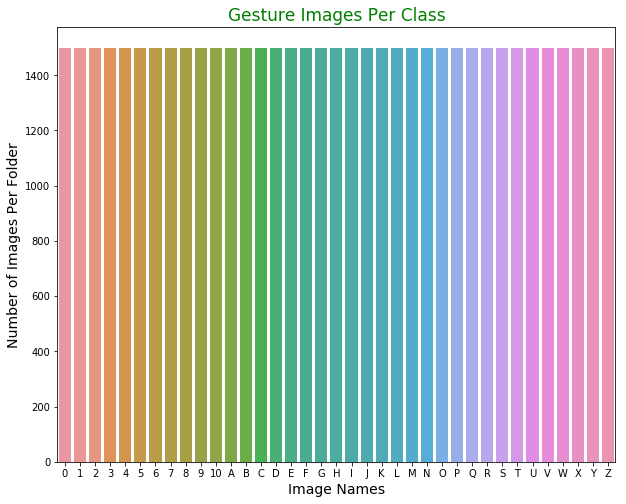

In [0]:
# Plotting the number of images per folder
plt.figure(figsize = (10,8))
sns.barplot(x = class_names, y = sizes)
plt.title('Gesture Images Per Class', fontsize = 17, color = 'green')
plt.xlabel('Image Names',fontsize = 14)
plt.ylabel('Number of Images Per Folder',fontsize = 14)
plt.show()

As we can see the number of images were equal in all the the folders

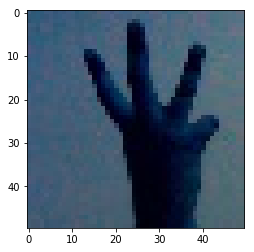

In [0]:
# Displaying a random image
index = np.random.randint(images.shape[0])
plt.figure()
plt.imshow(images[index])
plt.grid(False)
plt.show()

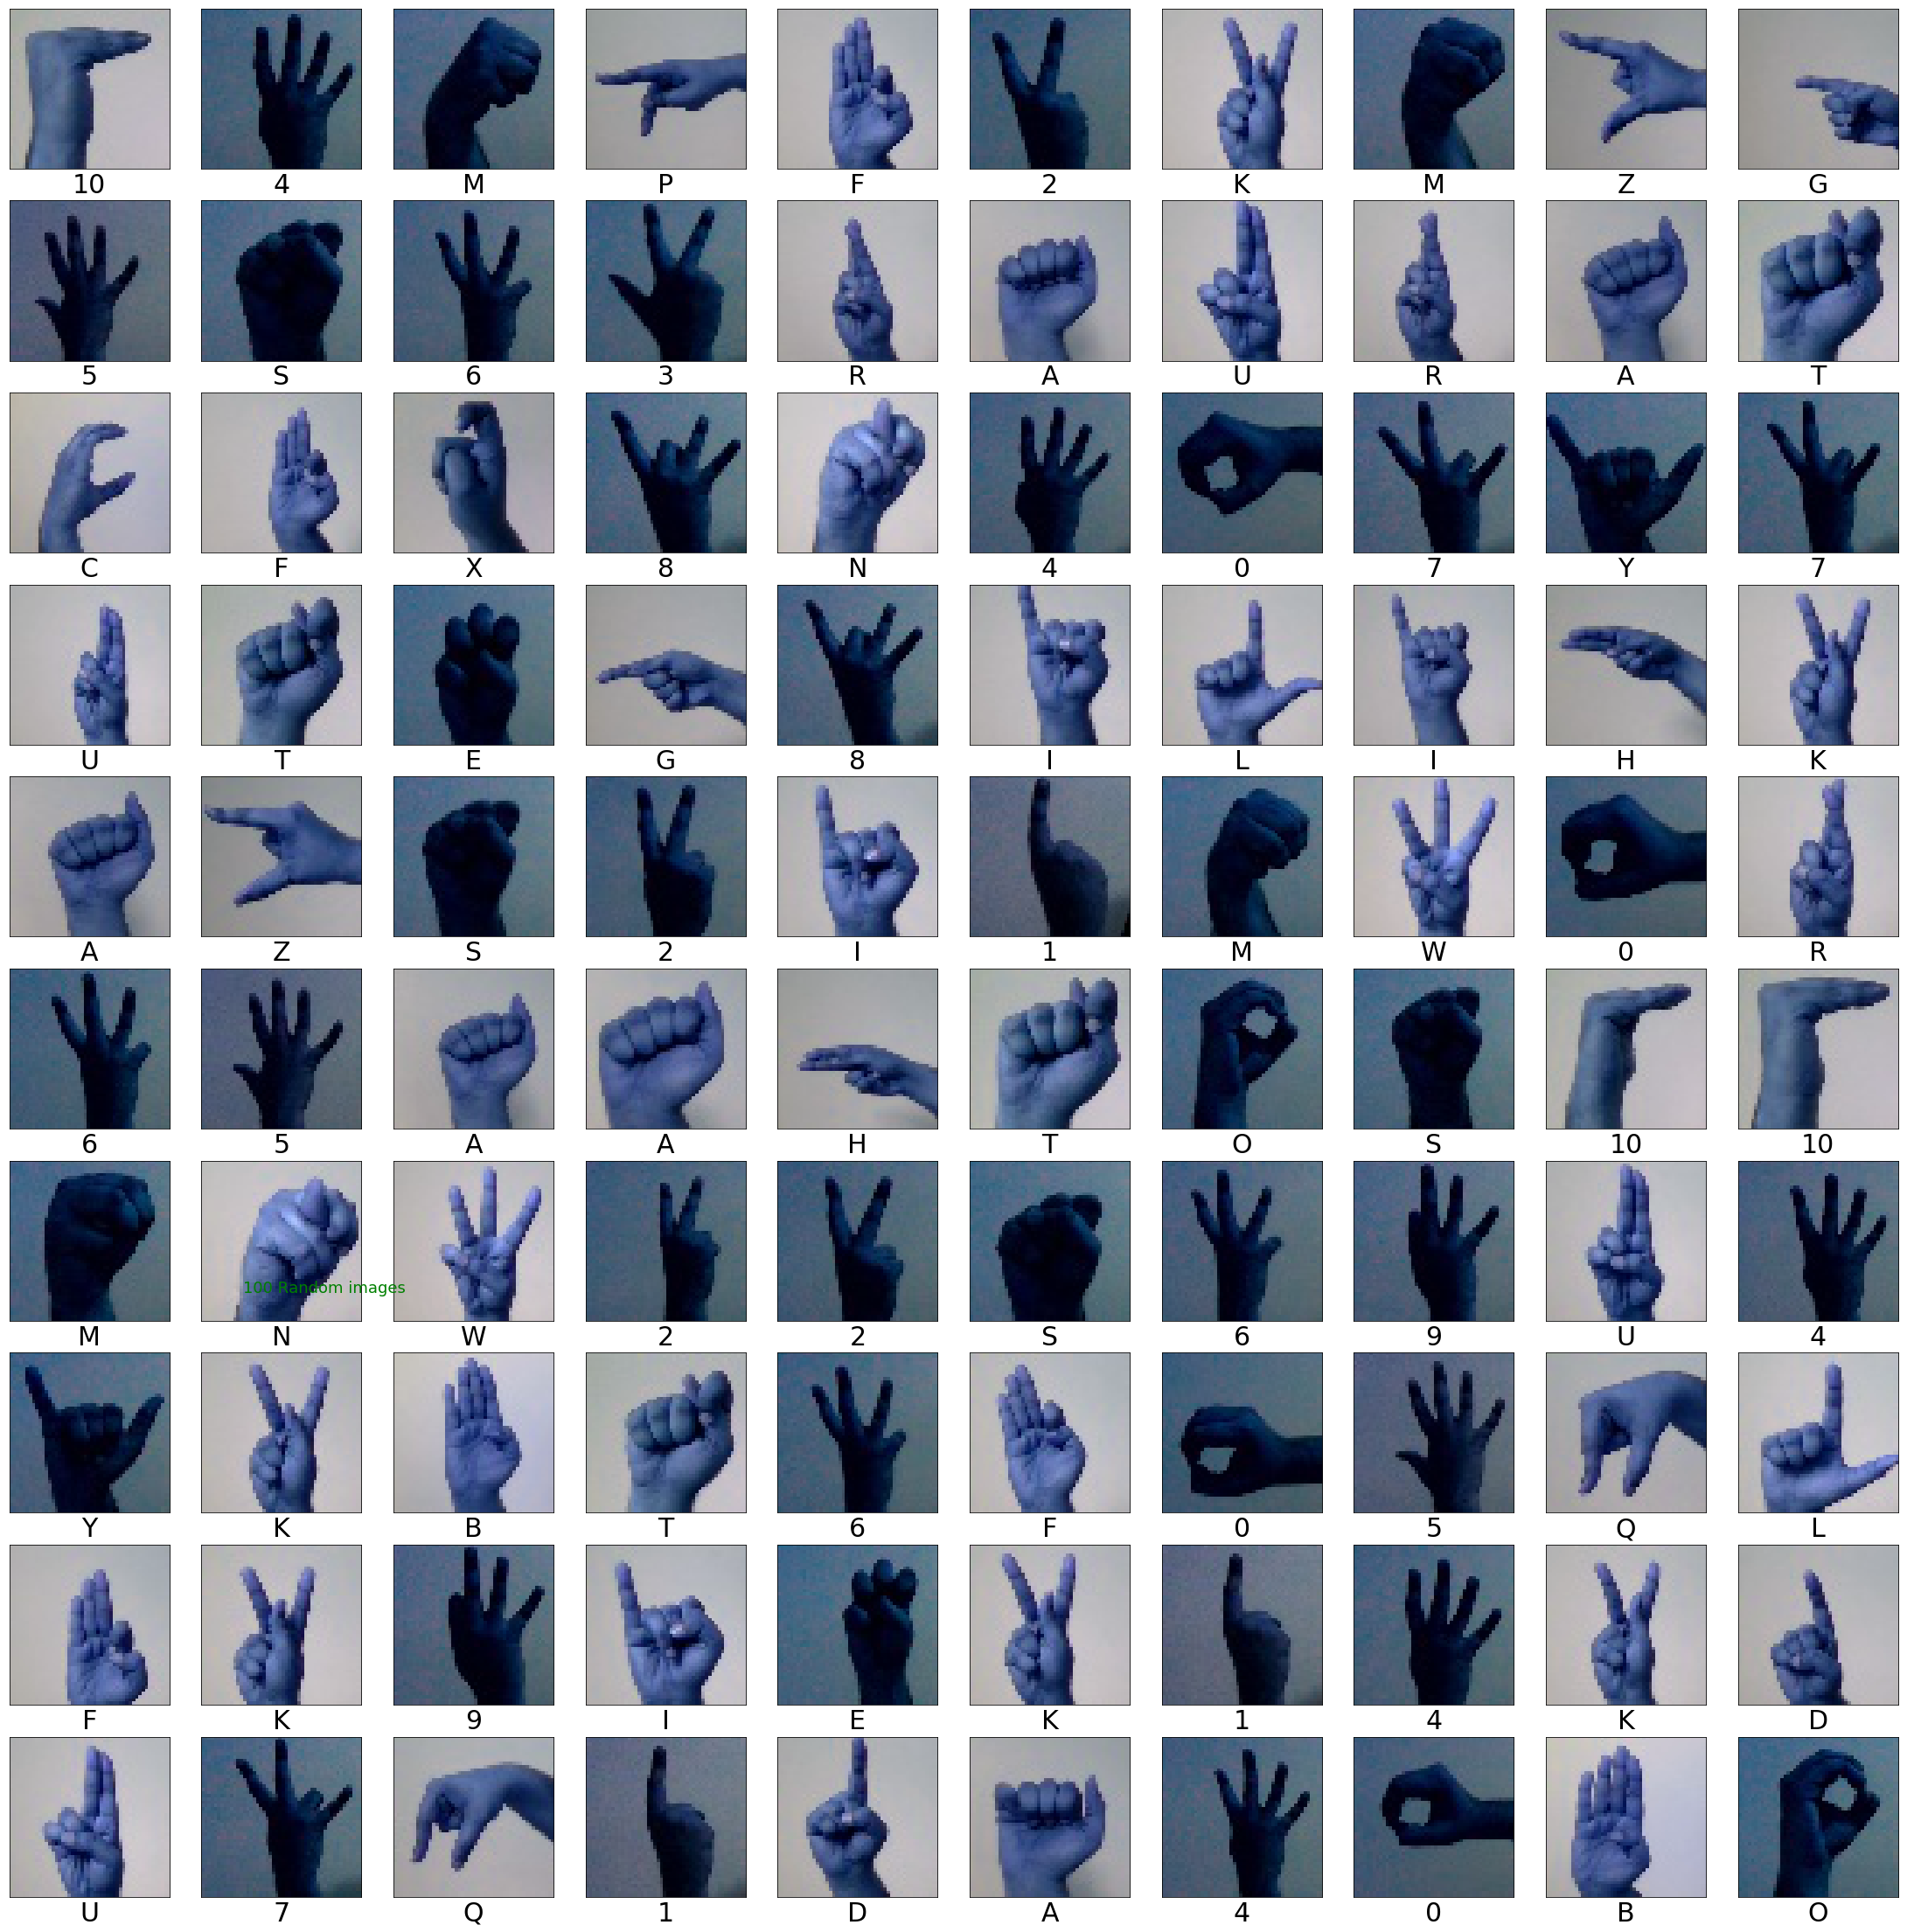

In [0]:
# Displaying 100 random images with their labels

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(0,0,3,3)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]],fontsize=30)

fig.suptitle("100 Random images",fontsize=18,color='green')
plt.show()

# Modelling Using TensorFlow

In [0]:
# Creating the feature set and target set into array

X = np.array(images)
y = np.array(labels)

In [0]:
# Splitting the dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [0]:
#check the shapes of the splits

print(X_test.shape)

(11100, 50, 50, 3)


In [0]:
# Modelling using keras in tensorflow

model1 = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3),activation ='relu',input_shape = (50,50,3)), # Creates a convolutional 2D layer1
    tf.keras.layers.MaxPooling2D(2,2), # Reduce the data into half while mantaining output depth
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # we flatten the output before we pass to fully connected layer
    tf.keras.layers.Dropout(0.5), #for regularization meaning 
    tf.keras.layers.Dense(128,activation=tf.nn.relu), #Convert the dimension of matrix to vector
    tf.keras.layers.Dense(37,activation=tf.nn.softmax) 
])

In [0]:
# Scaling the train and test
train_datagen = ImageDataGenerator(rescale = 1./255, )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
#create the image generators that create variation of images to improve the ability of the fit model 
# to generalize what is learnt from the new images

train_generator = train_datagen.flow(X_train,y_train,batch_size =128)
test_generator = test_datagen.flow(X_test,y_test, batch_size=128)


In [0]:
# Optimizing the model using adam optimizer 

model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Training with 5 epochs and verbose 0

histy = model1.fit_generator(train_generator, steps_per_epoch = None, epochs = 5, validation_data = (X_test,y_test), verbose=0)

# Measuring The Perfomace of Model

In [0]:
# Obtaining the train and test accuracy 
# Also obraining the train and testloss

train_loss,train_acc = model1.evaluate(X_train,y_train,verbose=0)
test_loss,test_acc = model1.evaluate(X_test,y_test,verbose=0)

print(f'The  train accuracy of the model is {train_acc} and the train loss is {train_loss}')
print("\n")
print(f'The  test accuracy of the model is {test_acc} and the test loss is {test_loss}')

The  train accuracy of the model is 0.9994369149208069 and the train loss is 0.03193566450886256


The  test accuracy of the model is 0.9997297525405884 and the test loss is 0.024724407024211713


optimization of parameters

Optimizer = adam(RMSProp + Momentum)
RMSProp : exponentially weighted average of the squares of the past gradients
Momentum: takes into account past graduent to have a better update
sparse categorical crossentropy as the loss function: each image belongs to one class only


In [0]:
# Displaying the general information of the model

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3872)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

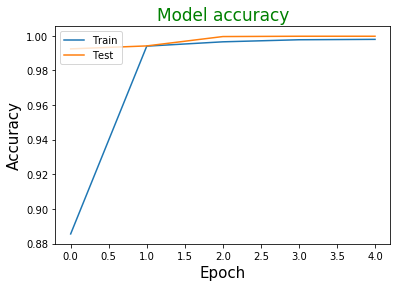

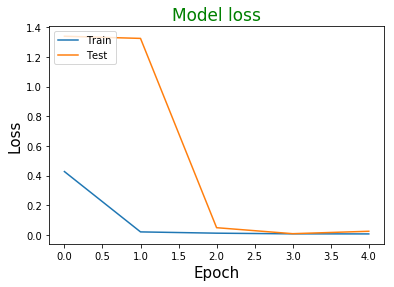

In [0]:
# Displaying the model accuracy against the epoch
plt.plot(histy.history['acc'])
plt.plot(histy.history['val_acc'])
plt.title('Model accuracy',fontsize = 17 ,color="green")
plt.ylabel('Accuracy',fontsize = 15)
plt.xlabel('Epoch',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Displaying the model loss against epoch
plt.plot(histy.history['loss'])
plt.plot(histy.history['val_loss'])
plt.title('Model loss',fontsize = 17,color="green")
plt.ylabel('Loss',fontsize = 15)
plt.xlabel('Epoch',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# save the model inorder we stop fitting again each time we need the model
model1.save_weights("model1_weights.h5")
model1.save("model1_keras.h5")


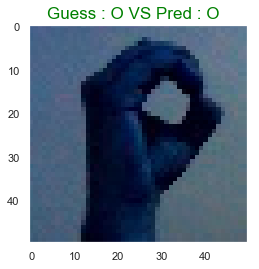

In [0]:
# Displaying what is predicted and what was actaul whether it was true

index1 = np.random.randint(X_val.shape[0]) # We choose a random index

img = (np.expand_dims(X_val[index1], 0))
predictions = model1.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[y_val[index1]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(X_val[index1])
plt.grid(False)
plt.title(title,fontsize=17,color="Green")
plt.show()

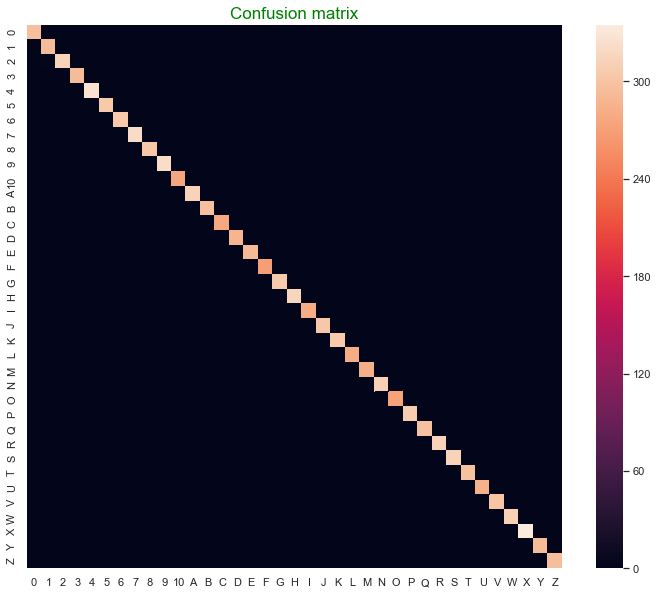

In [0]:
# Plotting the confusion matrix on a heatmap

plt.figure(figsize = (12,10))
predictions = model1.predict(X_val)
pred_labels = np.argmax(predictions, axis = 1)
CM = confusion_matrix(y_val, pred_labels)
ax = plt.axes()
sns.set(font_scale=1)
sns.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix',fontsize=17,color="Green")
plt.show()
